Step 1: Initial States
Before CZ (Control is Front |+>):


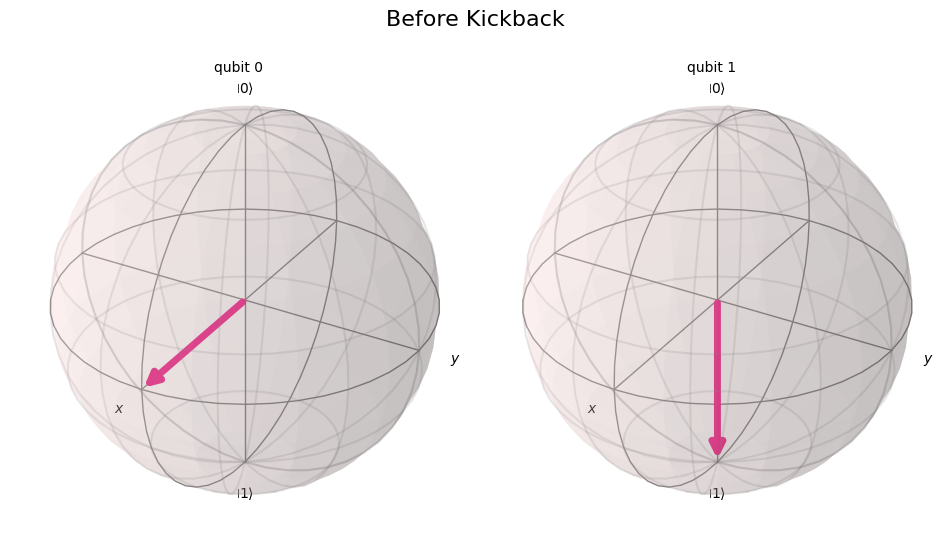


After CZ (Control flipped to Back |->):


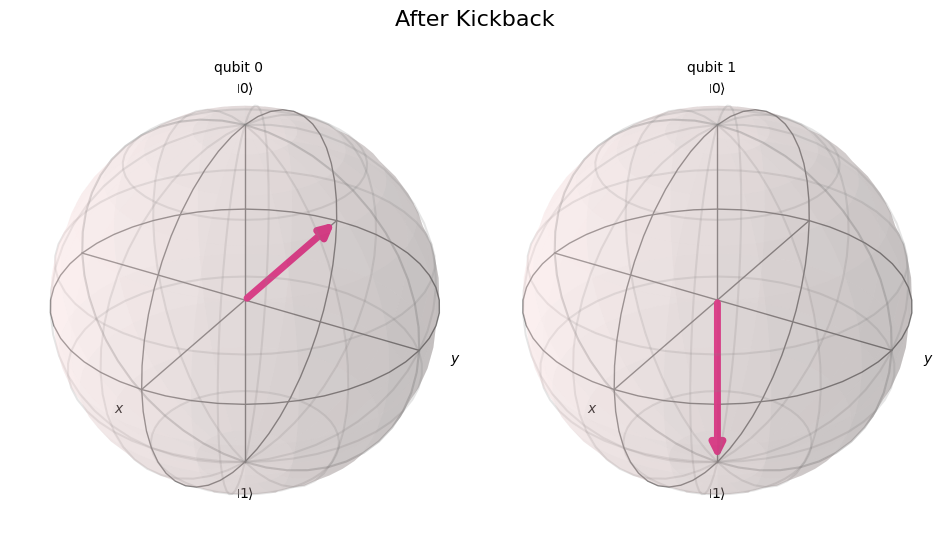

In [1]:
# --- Day 8: Phase Kickback Demo ---
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector

# 1. Setup the Circuit
qc = QuantumCircuit(2)

# 2. Prepare the States
# Control (q0): Put in Superposition |+>
qc.h(0)

# Target (q1): Put in state |1> (Eigenstate of Z gate)
qc.x(1) 

print("Step 1: Initial States")
# Visualization snapshot (before the kickback)
# Note: In simulations, we can peek at states independently before entangling
qc.save_statevector(label='init')

# 3. Apply Controlled-Z
# We are technically applying Z to q1, controlled by q0.
qc.cz(0, 1)

# 4. Result
# We expect the 'minus' phase from q1 to kick back up to q0, turning it into |->
qc.save_statevector(label='final')

# 5. Run Simulation
sim = AerSimulator()
data = sim.run(qc, shots=1).result().data()

# 6. Compare Bloch Spheres
print("Before CZ (Control is Front |+>):")
display(plot_bloch_multivector(data['init'], title="Before Kickback"))

print("\nAfter CZ (Control flipped to Back |->):")
display(plot_bloch_multivector(data['final'], title="After Kickback"))